Hello, my name is Artem. I'm going to review your project!

You can find my comments in <font color='green'>green</font>, <font color='blue'>blue</font> or <font color='red'>red</font> boxes like this:

<div class="alert alert-block alert-success">
<b>Success:</b> if everything is done succesfully
</div>

<div class="alert alert-block alert-info">
<b>Improve: </b> "Improve" comments mean that there are tiny corrections that could help you to make your project better.
</div>

<div class="alert alert-block alert-danger">
<b>Needs fixing:</b> if the block requires some corrections. Work can't be accepted with the red comments.
</div>

### <font color='orange'>General feedback</font>
* I'm glad to say that you executed your project really well.
* Your project has passed code-review. Congratulations!
* You've achieved good score! Well done!
* Parameters tuning was done correctly!
* You can make your project even better by working on the "improve" comments.
* You're on the right track. Keep it up!

# Project Description
Working on mobile carrier Megaline data for subcribers to recommend to management a model with minimum accuracy score of 75%. 

# Business Goal

As a result of previous analysis and recommendations;
* Split data into test, train and validation set.
* Investigate the quality of different models by changing hyperparameters.
* Check the quality of the model using the test set.
* Sanity check on models used.

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
import math
import matplotlib.pyplot as plt


<div class="alert alert-block alert-success">
<b>Success:</b> Thank you for collecting all imports in the first cell!
</div>

In [2]:
try:
    meg_user_behavoir = pd.read_csv('https://code.s3.yandex.net/datasets/users_behavior.csv')
except:
    meg_user_behavoir = pd.read_csv('datasets/users_behavior.csv')
meg_user_behavoir.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [3]:
meg_user_behavoir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [4]:
meg_user_behavoir.duplicated().sum()

0

In [5]:
meg_user_behavoir.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


In [6]:
features=meg_user_behavoir.drop('is_ultra',axis=1)
target = 'is_ultra'

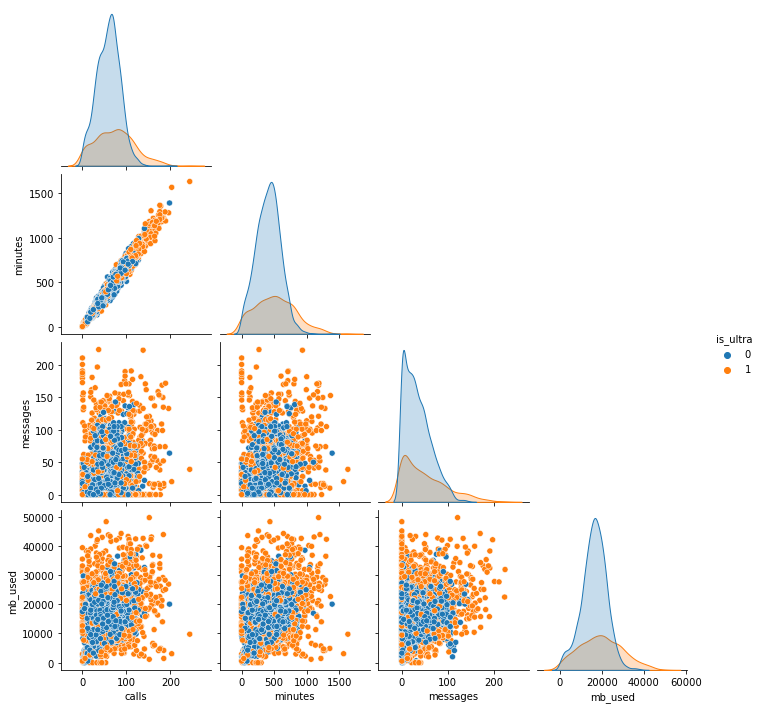

In [7]:
sns.pairplot(meg_user_behavoir, hue=target,corner=True);

0    2229
1     985
Name: is_ultra, dtype: int64
CLASS RATIO 3:2 



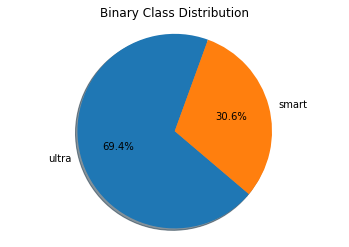

In [8]:
print(meg_user_behavoir.is_ultra.value_counts())
ultra, smart = meg_user_behavoir.is_ultra.value_counts()
print('CLASS RATIO {}:{}'.format(int(math.ceil(ultra/smart)),int(ultra/smart)),'\n')


plt.pie([ultra, smart],autopct='%1.1f%%',shadow=True, startangle=70,labels=['ultra','smart'])
plt.title('Binary Class Distribution')
plt.axis('equal')
plt.show();

## Conclusion
The megline dataset is made of float and int value columns with no null or duplicated entries. 

The distribution of the of the features show some outliers.

There are more ultra  than smart users with a class ratio of 3:1.

<div class="alert alert-block alert-success">
<b>Success:</b> Data laoding and initial analysis were done well. Glad to see that you've made some EDA.
</div>

## Split data into a training set, a validation set, and a test set.

In [9]:
x_train,x_test,y_train,y_test = train_test_split(features,meg_user_behavoir.is_ultra, test_size=0.2, random_state=123)
x_train, x_val, y_train,y_val = train_test_split(x_train,y_train, test_size=0.25, random_state=123)

In [10]:
x_train.shape,x_test.shape

((1928, 4), (643, 4))

In [11]:
print(f"train = {100*len(x_train)/len(meg_user_behavoir):.2f}%")
print(f"val = {100*len(x_val)/len(meg_user_behavoir):.2f}%")
print(f"test = {100*len(x_test)/len(meg_user_behavoir):.2f}%")

train = 59.99%
val = 20.01%
test = 20.01%


<div class="alert alert-block alert-success">
<b>Success:</b> Data was split correctly. Great that you've checked yourself.
</div>

## Investigate the quality of different models by changing hyperparameters.

In [12]:
for depth in range(1,10):
    model = DecisionTreeClassifier(random_state=123, max_depth=depth)
    model.fit(x_train,y_train)
    predictions = model.predict(x_val)
    print('max_depth =',depth, ': ', end='')
    print(accuracy_score(y_val,predictions))

max_depth = 1 : 0.7356143079315708
max_depth = 2 : 0.7651632970451011
max_depth = 3 : 0.7838258164852255
max_depth = 4 : 0.7822706065318819
max_depth = 5 : 0.7791601866251944
max_depth = 6 : 0.7884914463452566
max_depth = 7 : 0.7838258164852255
max_depth = 8 : 0.7853810264385692
max_depth = 9 : 0.7947122861586314


<div class="alert alert-block alert-success">
<b>Success:</b> In general, parameters tuning was done in the right way.
</div>

<div class="alert alert-block alert-info">
<b>Improve: </b> It would be better if all scores and parameters were collected in the one list and best one was selected with the help of "max" function.
</div>

In [13]:
for estimator in range(1,10):
    model = RandomForestClassifier(random_state=123, n_estimators=estimator)
    model.fit(x_train,y_train)
    print('n_estimator = ',estimator, ': ', end='')
    print(model.score(x_val, y_val))


n_estimator =  1 : 0.7122861586314152
n_estimator =  2 : 0.7853810264385692
n_estimator =  3 : 0.7698289269051322
n_estimator =  4 : 0.7900466562986003
n_estimator =  5 : 0.7667185069984448
n_estimator =  6 : 0.7869362363919129
n_estimator =  7 : 0.7776049766718507
n_estimator =  8 : 0.7869362363919129
n_estimator =  9 : 0.7822706065318819


In [14]:
model = LogisticRegression(random_state=123, solver='liblinear') 
model.fit(x_train,y_train)
model.score(x_val, y_val)

0.7013996889580093

In [15]:
model = LogisticRegression(random_state=123, solver='newton-cg') 
model.fit(x_train,y_train)
model.score(x_val, y_val)

0.7340590979782271

In [16]:
model = LogisticRegression(random_state=123, solver='lbfgs') 
model.fit(x_train,y_train)
model.score(x_val, y_val)

0.7340590979782271

## Conclusion
From the analysis using the validation set;
1. Max_depth of 9 for the DecisionTreeClassifier gave the highest score of 79.5%.
2. N_estimator of 6 for the RandomForestClassifier gave the highest score of 78.6%.
3. Both newton-cg and lbfgs for LogisticRegression gave the highest score of 73.4%.


<div class="alert alert-block alert-success">
<b>Success:</b> Great that you've tried several models.
</div>

## Check the quality of the model using the test set.

In [17]:
model = DecisionTreeClassifier(random_state=123, max_depth=3)
model.fit(x_train,y_train)
test_predict = model.predict(x_test)
print('DescisionTreeClassiffier Accuracy_score:', accuracy_score(y_test,test_predict)*100)

DescisionTreeClassiffier Accuracy_score: 80.55987558320373


In [18]:
model = RandomForestClassifier(random_state=123, n_estimators=3)
model.fit(x_train,y_train)
test_pred = model.predict(x_test)
print('RandomForest Accuracy_score:', accuracy_score(y_test,test_pred)*100)

RandomForest Accuracy_score: 76.20528771384136


In [19]:
model = LogisticRegression(random_state=123, solver='lbfgs') 
model.fit(x_train,y_train)
print('LogisticRegression Accuracy_score:', model.score(x_test, y_test)*100)

LogisticRegression Accuracy_score: 75.11664074650078


<div class="alert alert-block alert-success">
<b>Success:</b> Testing was done absolutely right!
</div>

## Conclusion
Using the test set, DecisionTreeClassifer gave the highest score of 80.6%. A rate lower than that from the validation set.

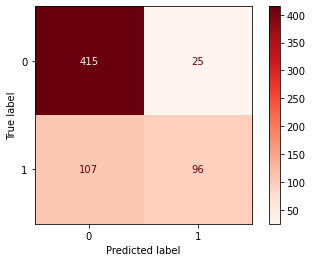

In [20]:
model = DecisionTreeClassifier(random_state=123, max_depth=9)
model.fit(x_train,y_train)
predictions = model.predict(x_val)
disp = plot_confusion_matrix(model, x_val, y_val,cmap='Reds')

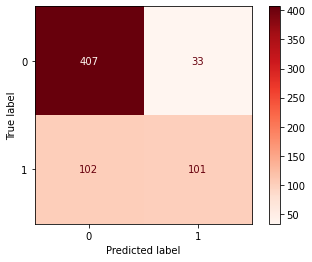

In [21]:
model = RandomForestClassifier(random_state=123, n_estimators=4)
model.fit(x_train,y_train)
disp = plot_confusion_matrix(model,x_val, y_val,cmap='Reds')

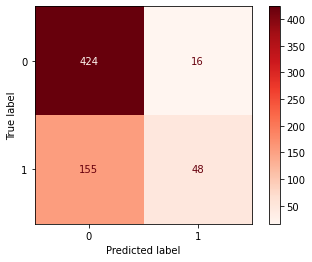

In [22]:
model = LogisticRegression(random_state=123, solver='newton-cg') 
model.fit(x_train,y_train)
model.score(x_val, y_val)
disp = plot_confusion_matrix(model, x_val, y_val,cmap='Reds')

## Conlclusion
The sanity check using confiusion matix on the highest score for the various models shows that, the LogisticRegression was a better predictor for ultra plan compared to the other two but least accurate predictor for smart users. 


<div class="alert alert-block alert-info">
<b>Improve: </b> Please use <a href="https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html"> DummyClassifier</a> for sanity check. Compare accuracy of models from previous step with dummy.
</div>

# Final Conclusion
**Data Analysis and Exploration**
There were no null or duplicated values in the dataset. There are more ultra plan users than smart users. 

**Findings**
* The highest model score of 79.5% on the validation set was from DecisionTreeClassifier.
* The highest model score of 80.5% on the test set was also from DecisionTreeClassifier.
* The results from the test set overall were higher for the test set relative to the validation set.
* The accuracy of prediction for the users (ultra,smart) varies depending on the model in use. 


<div class="alert alert-block alert-success">
<b>Success:</b> Great that final conclusion is well-structured!
</div>